In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
    
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

In [158]:
#from sklearn.model_selection import StratifiedKFold
#from sklearn.preprocessing  import StandardScaler

#TARGET_COL = 'likes'
#ID_COL = 'video_id'
def run_gradient_boosting(n_splits, clf, fit_params, train, test, features):
    
    N_SPLITS = n_splits
    oofs = np.zeros(len(train))
    preds = np.zeros((len(test)))

    target = train[TARGET_COL]

    folds = StratifiedKFold(n_splits = N_SPLITS)
    stratified_target = pd.qcut(train[TARGET_COL], 5, labels = False, duplicates='drop')

    feature_importances = pd.DataFrame()

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
        print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

        ### Validation Set
        X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

        ### Test Set
        X_test = test[features]

        scaler = StandardScaler()
        _ = scaler.fit(X_trn)

        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)

        _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

        fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
        feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

        ### Instead of directly predicting the classes we will obtain the probability of positive class.
        preds_val = clf.predict(X_val)
        preds_test = clf.predict(X_test)

        fold_score = av_metric(y_val, preds_val)
        print(f'\nAV metric score for validation set is {fold_score}')

        oofs[val_idx] = preds_val
        preds += preds_test / N_SPLITS


    oofs_score = av_metric(target, oofs)
    print(f'\n\nAV metric for oofs is {oofs_score}')

    feature_importances = feature_importances.reset_index(drop = True)
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
    fi.plot(kind = 'barh', figsize=(12, 6))

    return oofs, preds, fi

In [8]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Predata.csv')

In [4]:
def join_df(train, test):

    df = pd.concat([train, test], axis=0).reset_index(drop = True)
    features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
    df[num_cols + ['likes']] = df[num_cols + ['likes']].apply(lambda x: np.log1p(x))

    return df, features

def split_df_and_get_features(df, train_nrows):

    train, test = df[:train_nrows].reset_index(drop = True), df[train_nrows:].reset_index(drop = True)
    features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
  
    return train, test, features

In [10]:
TOP_N_WORDS = 50

vec = CountVectorizer(max_features = TOP_N_WORDS)
txt_to_fts = vec.fit_transform(df['description']).toarray()
txt_to_fts.shape

(37231, 50)

In [11]:
c = 'description'
txt_fts_names = [c + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
df[txt_fts_names] = txt_to_fts


In [12]:
TOP_N_WORDS = 20

vec = CountVectorizer(max_features = TOP_N_WORDS)
txt_to_fts = vec.fit_transform(df['tags']).toarray()
txt_to_fts.shape

(37231, 20)

In [13]:
c = 'tags'
txt_fts_names = [c + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
df[txt_fts_names] = txt_to_fts


In [49]:
train_proc, test_proc, features = split_df_and_get_features(df1, train.shape[0])
features = [c for c in df1.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [5]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

In [6]:
test= pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

In [18]:
df["RANK_channel_views"] = df.groupby(['channel_title','views'])['channel_title'].rank(method="first", ascending=True)
df["RANK_channel_cmnt"] = df.groupby(['channel_title','comment_count'])['channel_title'].rank(method="first", ascending=True)



------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.530099
[600]	valid_0's rmse: 0.507955
[900]	valid_0's rmse: 0.497312
[1200]	valid_0's rmse: 0.490304
[1500]	valid_0's rmse: 0.486755
[1800]	valid_0's rmse: 0.483938
[2100]	valid_0's rmse: 0.481754
[2400]	valid_0's rmse: 0.480371
[2700]	valid_0's rmse: 0.479369
[3000]	valid_0's rmse: 0.478507
[3300]	valid_0's rmse: 0.477804
[3600]	valid_0's rmse: 0.477175
[3900]	valid_0's rmse: 0.476896
[4200]	valid_0's rmse: 0.476683
[4500]	valid_0's rmse: 0.476365
[4800]	valid_0's rmse: 0.476247
Early stopping, best iteration is:
[4788]	valid_0's rmse: 0.476198

AV metric score for validation set is 476.19819141590506

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.523086
[600]	valid_0's rmse: 0.501991
[900]	valid_0's rmse: 0.493337
[1200]	valid_0's rmse: 0.487295
[1500]	valid_0's rmse: 0.483276
[1800]	vali

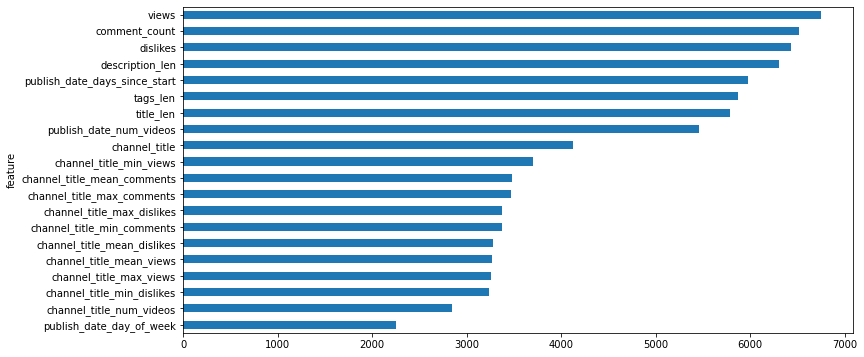

In [38]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.65,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.529996
[600]	valid_0's rmse: 0.507651
[900]	valid_0's rmse: 0.49759
[1200]	valid_0's rmse: 0.490689
[1500]	valid_0's rmse: 0.486156
[1800]	valid_0's rmse: 0.483176
[2100]	valid_0's rmse: 0.481462
[2400]	valid_0's rmse: 0.480318
[2700]	valid_0's rmse: 0.479487
[3000]	valid_0's rmse: 0.478962
[3300]	valid_0's rmse: 0.478234
[3600]	valid_0's rmse: 0.477602
[3900]	valid_0's rmse: 0.477117
[4200]	valid_0's rmse: 0.476838
[4500]	valid_0's rmse: 0.476647
Early stopping, best iteration is:
[4555]	valid_0's rmse: 0.47655

AV metric score for validation set is 476.55037001981543

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.527068
[600]	valid_0's rmse: 0.505515
[900]	valid_0's rmse: 0.495834
[1200]	valid_0's rmse: 0.490322
[1500]	valid_0's rmse: 0.486493
[1800]	valid_0's rmse: 0.484274
[2100]	valid_

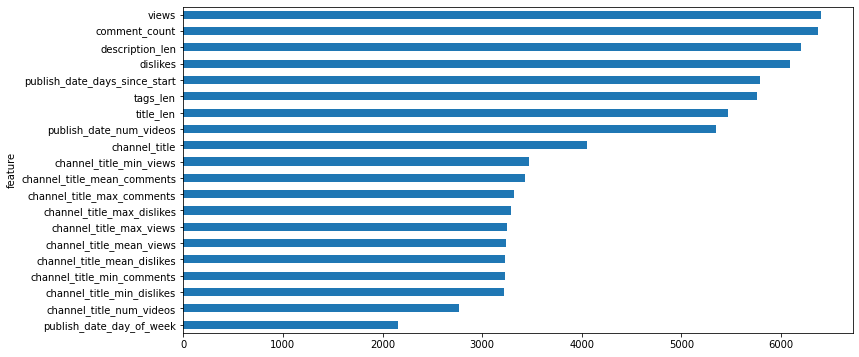

In [53]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.65,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs1, lgb_preds1, fi = run_gradient_boosting(clf, fit_params, train_proc1, test_proc1, cat_num_cols1)

In [51]:
from lightgbm import LGBMRegressor

In [54]:
lr_train['lgb1'] = lgb_oofs1
lr_test['lgb1'] = lgb_preds1

In [ ]:
lgb_preds[:5]

array([6.54845316, 8.03892615, 3.92211551, 7.87610938, 6.02173588])

In [ ]:
preds = np.expm1(lgb_preds)
sslg = pd.DataFrame({'video_id':test.video_id})
sslg['likes'] = preds

In [ ]:
predscb = np.expm1(cb_preds)
sscb = pd.DataFrame({'video_id':test.video_id})
sscb['likes'] = predscb

In [ ]:
sslg.head()

,video_id,likes
0,87185,697.163390
1,9431,3098.283241
2,40599,49.507180
3,494,2632.606233
4,73942,411.293666


In [ ]:
from google.colab import files


In [ ]:
sslg.to_csv('/content/drive/My Drive/Colab Notebooks/lgb_bowtg.csv', index=False)

In [ ]:
sscb.to_csv('/content/drive/My Drive/Colab Notebooks/cb_bowtg.csv', index=False)

In [ ]:
def download_preds(file_name = 'hacklive_sub.csv'):

  
 
  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [ ]:
download_preds(file_name='lgb_fin1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
train_proc1, test_proc1, features = split_df_and_get_features(df, train.shape[0])
features1 = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols1 = [c for c in features1 if c not in ['title', 'tags', 'description', 'publish_date']]


------------- Fold 1 -------------
0:	learn: 1.8599750	test: 1.8523934	best: 1.8523934 (0)	total: 16.6ms	remaining: 2m 45s
200:	learn: 0.5854381	test: 0.6143374	best: 0.6143374 (200)	total: 3.24s	remaining: 2m 38s
400:	learn: 0.5141218	test: 0.5621136	best: 0.5621136 (400)	total: 6.42s	remaining: 2m 33s
600:	learn: 0.4748727	test: 0.5383689	best: 0.5383689 (600)	total: 9.57s	remaining: 2m 29s
800:	learn: 0.4467494	test: 0.5248516	best: 0.5248516 (800)	total: 12.7s	remaining: 2m 26s
1000:	learn: 0.4253570	test: 0.5164813	best: 0.5164565 (999)	total: 15.9s	remaining: 2m 22s
1200:	learn: 0.4090832	test: 0.5114284	best: 0.5114284 (1200)	total: 19s	remaining: 2m 18s
1400:	learn: 0.3922588	test: 0.5063143	best: 0.5063143 (1400)	total: 22.1s	remaining: 2m 15s
1600:	learn: 0.3774663	test: 0.5021801	best: 0.5021801 (1600)	total: 25.3s	remaining: 2m 12s
1800:	learn: 0.3645991	test: 0.4984501	best: 0.4984428 (1799)	total: 28.4s	remaining: 2m 9s
2000:	learn: 0.3524871	test: 0.4953731	best: 0.4953

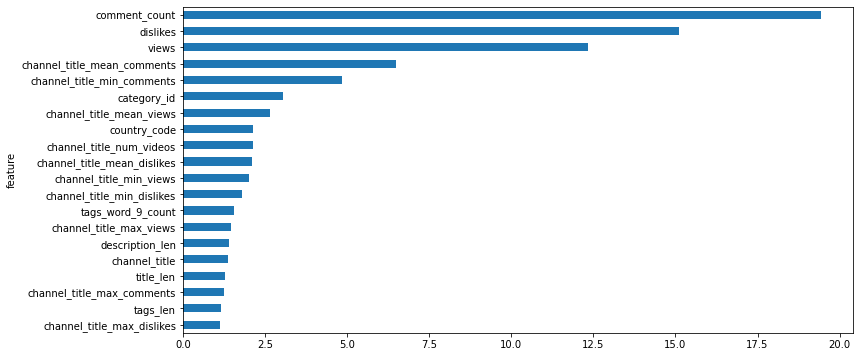

In [64]:
clf = CatBoostRegressor(n_estimators = 10000,
                       learning_rate = 0.05,
                       rsm = 0.76, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [65]:
lr_train['cb1'] = cb_oofs
lr_test['cb1'] = cb_preds


------------- Fold 1 -------------
0:	learn: 1.8616808	test: 1.8540389	best: 1.8540389 (0)	total: 18.3ms	remaining: 3m 3s
200:	learn: 0.5859991	test: 0.6152616	best: 0.6152616 (200)	total: 3.27s	remaining: 2m 39s
400:	learn: 0.5126930	test: 0.5605731	best: 0.5605731 (400)	total: 6.55s	remaining: 2m 36s
600:	learn: 0.4755802	test: 0.5397131	best: 0.5397131 (600)	total: 10.3s	remaining: 2m 41s
800:	learn: 0.4481497	test: 0.5250569	best: 0.5250569 (800)	total: 14.1s	remaining: 2m 42s
1000:	learn: 0.4264744	test: 0.5153919	best: 0.5153919 (1000)	total: 17.3s	remaining: 2m 35s
1200:	learn: 0.4084748	test: 0.5093803	best: 0.5093608 (1191)	total: 20.5s	remaining: 2m 30s
1400:	learn: 0.3928750	test: 0.5043395	best: 0.5043395 (1400)	total: 23.7s	remaining: 2m 25s
1600:	learn: 0.3779429	test: 0.5002370	best: 0.5002370 (1600)	total: 26.9s	remaining: 2m 21s
1800:	learn: 0.3649000	test: 0.4964917	best: 0.4964742 (1799)	total: 30.1s	remaining: 2m 16s
2000:	learn: 0.3530061	test: 0.4935465	best: 0.4

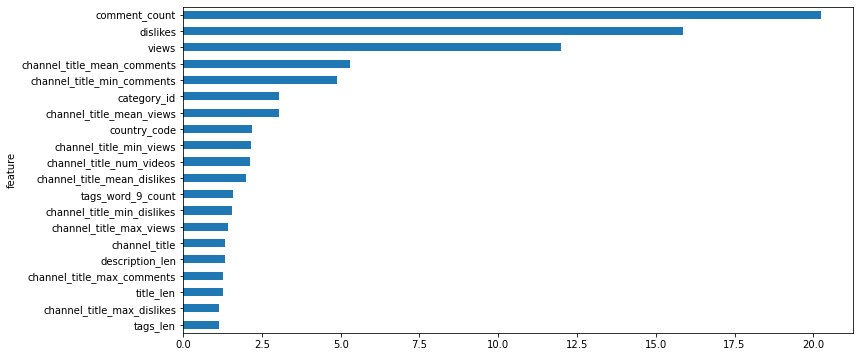

In [34]:
clf = CatBoostRegressor(n_estimators = 10000,
                       learning_rate = 0.05,
                       rsm = 0.76, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs1, cb_preds1, fi = run_gradient_boosting(clf, fit_params, train_proc1, test_proc1, cat_num_cols1)

In [25]:
!pip install -q catboost
from catboost import CatBoostRegressor

In [ ]:
 av_metric(train['likes'], lgb_oofs * 0.50 + cb_oofs * 0.50)

463.0751986322361

In [ ]:
train['likes'].head()

0     2351.0
1     3264.0
2      580.0
3    82773.0
4     3557.0
Name: likes, dtype: float64

In [ ]:
train['likes'] = np.log1p(train['likes'])

In [ ]:
lgb_oofs[:5]

array([ 7.67633649,  8.40665061,  5.37227676, 10.48238522,  8.07581096])

In [ ]:
train['likes'][:5]

0     7.763021
1     8.091015
2     6.364751
3    11.323869
4     8.176954
Name: likes, dtype: float64

In [ ]:
ens_predstg = np.expm1(lgb_preds * 0.50 + cb_preds * 0.50)
ens_1tg = pd.DataFrame({'video_id':test.video_id})
ens_1tg['likes'] = ens_predstg

In [ ]:
ens_1tg.to_csv('/content/drive/My Drive/Colab Notebooks/ens_tg_2nm.csv', index=False)

ens_1tg or ens_tg_2nm.csv till now; 10/4/2020, 1:10 pm

In [ ]:
ens_1.head()

,video_id,likes
0,87185,757.895158
1,9431,2515.068507
2,40599,47.792302
3,494,2783.635772
4,73942,532.399930


In [ ]:
download_preds(file_name='ens1_no_meta.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ens_1.to_csv('/content/drive/My Drive/Colab Notebooks/ens1_no_meta.csv', index=False)

In [ ]:
train_new = pd.DataFrame()
test_new = pd.DataFrame()

train_new['cb'] = cb_oofs
train_new['lgb'] = lgb_oofs
train_new['likes'] = train['likes']

test_new['cb'] = cb_preds
test_new['lgb'] = lgb_preds

In [ ]:
train_new.head()

,cb,lgb,likes
0,7.774883,7.676336,7.763021
1,8.327288,8.406651,8.091015
2,5.638850,5.372277,6.364751
3,10.952559,10.482385,11.323869
4,8.293664,8.075811,8.176954


In [ ]:
test_new.head()

,cb,lgb
0,6.657346,6.611014
1,7.789561,7.863910
2,3.905570,3.872847
3,7.923671,7.938582
4,6.316550,6.248771


In [ ]:
features = ['cb','lgb']


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[43]	valid_0's rmse: 0.468386

AV metric score for validation set is 468.38607073868457

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[56]	valid_0's rmse: 0.474437

AV metric score for validation set is 474.4374342461445

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[51]	valid_0's rmse: 0.464306

AV metric score for validation set is 464.30621220134964

------------- Fold 4 -------------
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[56]	valid_0's rmse: 0.460376

AV metric score for validation set is 460.37637714118097

------------- Fold 5 -------------
Training until validation scores don't improve for 200 rounds.
Early stopping

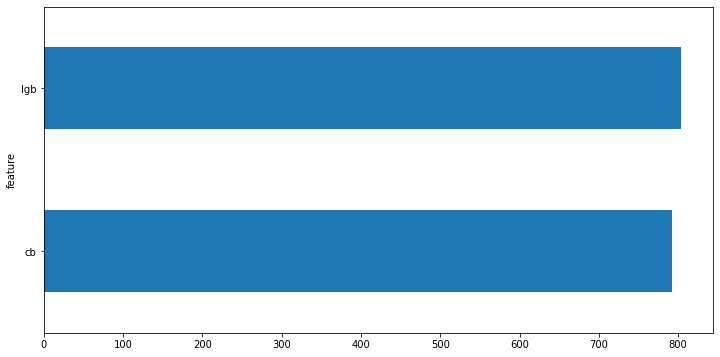

In [ ]:
clf = LGBMRegressor(n_estimators = 1500,
                        learning_rate = 0.1,
                        colsample_bytree = 0.80,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_new, test_new, features)


In [ ]:
ens_preds[:5]

array([6.61233883, 7.81956547, 3.69873574, 7.94929105, 6.30380323])

In [ ]:
ens_preds1 = np.expm1(lgb_preds)
ens3 = pd.DataFrame({'video_id':test.video_id})
ens3['likes'] = ens_preds1

In [ ]:
ens3.head()

,video_id,likes
0,87185,737.010572
1,9431,2461.918658
2,40599,40.903601
3,494,2849.113882
4,73942,550.309013


In [ ]:
ens3.to_csv('/content/drive/My Drive/Colab Notebooks/ens2_meta.csv', index=False)

In [ ]:
df1 = df.copy()

In [ ]:
#df['cat_mean_views'] = df.groupby('category_id')['views'].transform('mean')
#df['cat_max_views'] = df.groupby('category_id')['views'].transform('max')
#df['cat_min_views'] = df.groupby('category_id')['views'].transform('min')

#df['cat_comments'] = df.groupby('category_id')['comment_count'].transform('mean')
#df['cat_comments'] = df.groupby('category_id')['comment_count'].transform('max')
#df['cat_comments'] = df.groupby('category_id')['comment_count'].transform('min')

In [ ]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [ ]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.75,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.532779
[600]	valid_0's rmse: 0.50853
[900]	valid_0's rmse: 0.497628


KeyboardInterrupt: ignored

In [ ]:
df = df1.copy()


------------- Fold 1 -------------
[11:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.91435
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.523917
[400]	validation_0-rmse:0.503779
[600]	validation_0-rmse:0.493385
[800]	validation_0-rmse:0.487876
[1000]	validation_0-rmse:0.485182
[1200]	validation_0-rmse:0.483074
[1400]	validation_0-rmse:0.482307
[1600]	validation_0-rmse:0.481049
[1800]	validation_0-rmse:0.48029
[2000]	validation_0-rmse:0.479666
[2200]	validation_0-rmse:0.479483
[2400]	validation_0-rmse:0.479064
[2600]	validation_0-rmse:0.47897
[2800]	validation_0-rmse:0.478648
[3000]	validation_0-rmse:0.478533
[3200]	validation_0-rmse:0.478351
[3400]	validation_0-rmse:0.478197
[3600]	validation_0-rmse:0.478128
[3800]	validation_0-rmse:0.478091
Stopping. Best iteration:
[3624]	validation_0-rmse:0.47806


AV metric score for validation set is 47

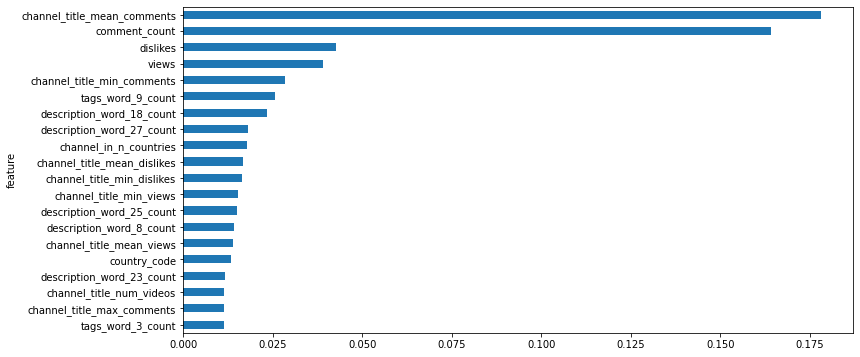

In [45]:
#without rank
clf = XGBRegressor(n_estimators = 5000,
                    max_depth = 6,
                    learning_rate = 0.08,
                    colsample_bytree = 0.65,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs1, xgb_preds1, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

xgb


------------- Fold 1 -------------
[16:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.91435
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.526189
[400]	validation_0-rmse:0.504385
[600]	validation_0-rmse:0.495325
[800]	validation_0-rmse:0.490234
[1000]	validation_0-rmse:0.48582
[1200]	validation_0-rmse:0.483719
[1400]	validation_0-rmse:0.482024
[1600]	validation_0-rmse:0.480561
[1800]	validation_0-rmse:0.479412
[2000]	validation_0-rmse:0.47845
[2200]	validation_0-rmse:0.477905
[2400]	validation_0-rmse:0.47727
[2600]	validation_0-rmse:0.47696
[2800]	validation_0-rmse:0.476757
[3000]	validation_0-rmse:0.476782
[3200]	validation_0-rmse:0.476709
Stopping. Best iteration:
[3095]	validation_0-rmse:0.476568


AV metric score for validation set is 476.5683295343605

------------- Fold 2 -------------
[16:08:31] WARNING: /workspace/src/objective/regres

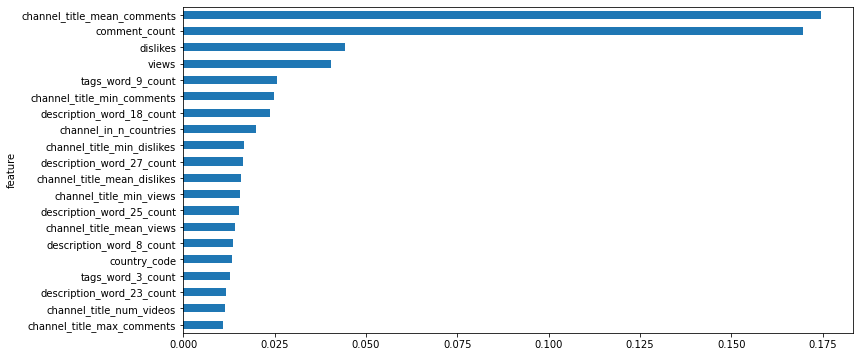

In [71]:
#with rank
clf = XGBRegressor(n_estimators = 5000,
                    max_depth = 6,
                    learning_rate = 0.08,
                    colsample_bytree = 0.65,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc1, test_proc1, cat_num_cols1)

In [72]:
lr_train['xgb1'] = xgb_oofs
lr_test['xgb1'] = xgb_preds

In [69]:
from xgboost import XGBRegressor

In [36]:
df1 = df.copy()
df1.drop(['RANK_channel_views', 'RANK_channel_cmnt'], axis=1, inplace=True)

In [50]:
av_metric(train_proc['likes'], 0.31*lgb_oofs + 0.34*xgb_oofs + 0.35*cb_oofs1)

459.05893355307444

In [52]:
av_metric(train_proc['likes'], 0.32*lgb_oofs + 0.33*xgb_oofs1 + 0.35*cb_oofs1)

458.8176686239211

In [54]:
av_metric(train_proc['likes'], 0.31*lgb_oofs + 0.34*xgb_oofs1 + 0.35*cb_oofs1)

458.798896675314

In [48]:
prens1 = np.expm1(0.33*lgb_preds + 0.33*xgb_preds1 + 0.34*cb_preds1)
prens1_df = pd.DataFrame({'video_id':test.video_id})
prens1_df['likes'] = prens1
prens1_df.to_csv('/content/drive/My Drive/Colab Notebooks/prens1.csv', index=False)

In [55]:
prens2 = np.expm1(0.31*lgb_preds + 0.34*xgb_preds1 + 0.35*cb_preds1)
prens2_df = pd.DataFrame({'video_id':test.video_id})
prens2_df['likes'] = prens2
prens2_df.to_csv('/content/drive/My Drive/Colab Notebooks/prens2.csv', index=False)

This gave highest till now; "ens4tg1_nm_preds = np.expm1(0.31*lgb_preds + 0.34*xgb_preds1 + 0.35*cb_preds1)"; 10/4/2020; 5:16 pm Saved in prens2_df or prens2.csv giving oof score 458.798896675314

In [35]:
from sklearn.linear_model import LinearRegression

#lr_ensdftr, lr_ensddftt = pd.DataFrame(), pd.DataFrame()
#lr_ensdftr['lgb'] = lgb_oofs
lr_ensdftr['cb'] = cb_oofs1
#lr_ensdftr['xgb'] = xgb_oofs1

#lr_ensddftt['lgb'] = lgb_preds
lr_ensddftt['cb'] = cb_preds1
#lr_ensddftt['xgb'] = xgb_preds1

#lr_ensdftr['likes'] = train_proc['likes']

NameError: ignored

In [36]:
lr_train['cb'] = cb_oofs1
lr_test['cb'] = cb_preds1

In [37]:
lr_train.head()

,lgb,cb,xgb,likes
0,7.738653,7.787053,7.861619,7.763021
1,8.237565,8.431979,8.163631,8.091015
2,5.644939,5.131428,5.076780,6.364751
3,10.861363,10.893221,10.697611,11.323869
4,8.023879,8.212206,8.127529,8.176954


In [59]:
lr_ensdftr.head()

,lgb,cb,xgb,likes
0,7.738653,7.789298,7.861619,7.763021
1,8.237565,8.436295,8.163631,8.091015
2,5.644939,5.123500,5.076780,6.364751
3,10.861363,10.910193,10.697611,11.323869
4,8.023879,8.191556,8.127529,8.176954


In [60]:
lr_ensddftt.head()

,lgb,cb,xgb
0,6.548453,6.612837,6.589077
1,8.038926,7.929099,7.917825
2,3.922116,3.806985,4.133798
3,7.876109,7.880276,7.948970
4,6.021736,6.134418,6.013078


In [ ]:
lr_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lr_train6f1.csv')
lr_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lr_test6f1.csv')

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr =LinearRegression()
X = lr_train[['lgb', 'cb', 'xgb', 'lgb1', 'cb1', 'xgb1']]
y = lr_train['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [75]:
y.head()

0     7.763021
1     8.091015
2     6.364751
3    11.323869
4     8.176954
Name: likes, dtype: float64

In [90]:

lr.fit(X_train, y_train)
print('Train:',av_metric(y_train, lr.predict(X_train)))
print('Test:',av_metric(y_test, lr.predict(X_test)))


Train: 456.87742260288036
Test: 459.7368889732418


In [105]:
print(av_metric(lr_train['likes'], 0.29*lr_train['cb'] + 0.18*lr_train['xgb'] + 0.1675*lr_train['lgb'] + 0.1675*lr_train['cb1'] + 0.18*lr_train['xgb1'] + 0.015*lr_train['lgb1']))

457.51218146602014


In [126]:
for i in range(len(X)[1]):
  print(X.columns[i],lr.coef_[i])

TypeError: ignored

In [78]:
lr_ens_preds5 = lr.predict(lr_test[['lgb', 'cb', 'xgb', 'lgb1', 'cb1', 'xgb1']])
lr_ens_predsex5 = np.expm1(lr_ens_preds5)
lr_df5 = pd.DataFrame({'video_id':test.video_id})
lr_df5['likes'] = lr_ens_predsex5
lr_df5.to_csv('/content/drive/My Drive/Colab Notebooks/prens6.csv', index=False)

In [60]:
lr_df3['likes'][:5]

0     734.059935
1    2841.488506
2      49.144967
3    2728.193955
4     430.821474
Name: likes, dtype: float64

In [140]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 10

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 3, labels = False)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    #scaler = StandardScaler()
    #_ = scaler.fit(X_trn)

    #X_trn = scaler.transform(X_trn)
    #X_val = scaler.transform(X_val)
    #X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = av_metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

In [154]:
feat = ['lgb', 'cb', 'xgb', 'cb1', 'xgb1']
lr_oofs11, lr_preds11, fi = run_gradient_boosting(lr,feat, lr_train, lr_test, feat)


------------- Fold 1 -------------


TypeError: ignored

In [120]:
lrpreds11ex6 = np.expm1(lr_preds11)
lr_df6 = pd.DataFrame({'video_id':test.video_id})
lr_df6['likes'] = lrpreds11ex6
lr_df6.to_csv('/content/drive/My Drive/Colab Notebooks/prens9.csv', index=False)

In [81]:
lr_ensdftr.to_csv('/content/drive/My Drive/Colab Notebooks/lr_ensdftr.csv', index=False)
lr_ensddftt.to_csv('/content/drive/My Drive/Colab Notebooks/lr_ensddftt.csv', index=False)


In [83]:
df1.to_csv('/content/drive/My Drive/Colab Notebooks/dfnorank.csv', index=False)
df.to_csv('/content/drive/My Drive/Colab Notebooks/dfrank.csv', index=False)


In [8]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dfrank.csv')
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dfnorank.csv')

In [9]:
lr_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lr_ensdftr.csv')
lr_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lr_ensddftt.csv')

In [74]:
lr_train.head()

,lgb,cb,xgb,likes,lgb1,cb1,xgb1
0,7.738653,7.787053,7.861619,7.763021,7.727381,7.854191,7.840986
1,8.237565,8.431979,8.163631,8.091015,8.247914,8.357369,8.225670
2,5.644939,5.131428,5.076780,6.364751,5.413485,5.432454,4.838971
3,10.861363,10.893221,10.697611,11.323869,10.531990,10.939549,10.631687
4,8.023879,8.212206,8.127529,8.176954,7.934715,8.044502,8.158417


In [75]:
lr_train.to_csv('/content/drive/My Drive/Colab Notebooks/lr_train6f1.csv', index=False)
lr_test.to_csv('/content/drive/My Drive/Colab Notebooks/lr_test6f1.csv', index=False)

In [10]:
from sklearn.ensemble import RandomForestRegressor
!pip install -q catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 66.1MB 65kB/s 



------------- Fold 1 -------------
0:	learn: 1.8239163	test: 1.8335152	best: 1.8335152 (0)	total: 7.09ms	remaining: 35.4s
200:	learn: 0.4504928	test: 0.4615891	best: 0.4615891 (200)	total: 1.45s	remaining: 34.6s
400:	learn: 0.4382628	test: 0.4612482	best: 0.4608586 (317)	total: 2.85s	remaining: 32.7s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4608585596
bestIteration = 317

Shrink model to first 318 iterations.

AV metric score for validation set is 460.8585605632232

------------- Fold 2 -------------
0:	learn: 1.8257959	test: 1.8203523	best: 1.8203523 (0)	total: 10ms	remaining: 50.1s
200:	learn: 0.4484672	test: 0.4649973	best: 0.4649795 (192)	total: 1.33s	remaining: 31.7s
400:	learn: 0.4350614	test: 0.4660586	best: 0.4649367 (218)	total: 2.53s	remaining: 29s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4649366616
bestIteration = 218

Shrink model to first 219 iterations.

AV metric score for validation set is 464.93666475443655

----

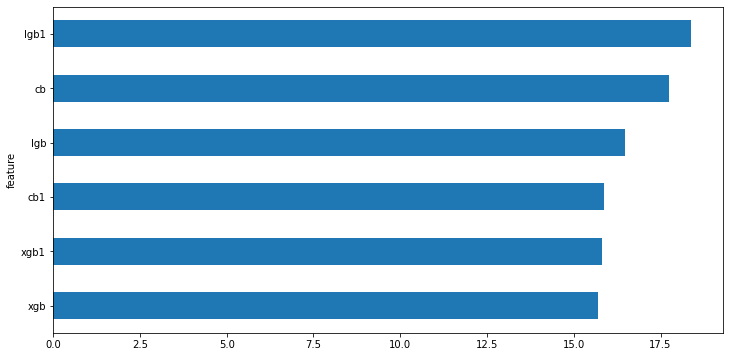

In [168]:
#from catboost import CatBoostRegressor
#rfc = RandomForestRegressor()
cb_ens = CatBoostRegressor(random_state=2054,
                        learning_rate=0.06,
                        n_estimators=5000)

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
feat = ['lgb', 'cb', 'xgb', 'cb1', 'xgb1', 'lgb1']

#rfc_oofs, rfc_preds = run_clf_kfold(rfc, lr_train, lr_test, feat)
cb_ens_oofs, cb_ens_preds, fi = run_gradient_boosting(7,cb_ens, fit_params, lr_train, lr_test, feat)

In [169]:
cb_ens_predsex1 = np.expm1(cb_ens_preds)
cb_ensdf5 = pd.DataFrame({'video_id':test.video_id})
cb_ensdf5['likes'] = cb_ens_predsex1

In [170]:
cb_ensdf5.head()

,video_id,likes
0,87185,753.496150
1,9431,2704.153317
2,40599,50.581317
3,494,2778.511130
4,73942,403.182970


In [171]:
cb_ensdf5.to_csv('/content/drive/My Drive/Colab Notebooks/cbensdf7.csv', index=False)

Till now prens 3; 8:48 pm

In [80]:
lr_df1.head()

,video_id,likes
0,87185,727.564914
1,9431,2854.200010
2,40599,50.067040
3,494,2720.570902
4,73942,430.183244


In [65]:
lr_oofs, lr_preds = run_clf_kfold(lr, lr_ensdftr, lr_ensddftt, ['lgb', 'cb', 'xgb'])


------------- Fold 1 -------------

AV metric score for validation set is 464.71984777302737

------------- Fold 2 -------------

AV metric score for validation set is 464.7198809283552

------------- Fold 3 -------------

AV metric score for validation set is 452.9183470698232

------------- Fold 4 -------------

AV metric score for validation set is 447.5149972556832

------------- Fold 5 -------------

AV metric score for validation set is 463.82807262719564


AV metric for oofs is 458.7965424968642


In [ ]:
train_proc['likes'].head()

0     7.763021
1     8.091015
2     6.364751
3    11.323869
4     8.176954
Name: likes, dtype: float64

In [4]:
ens4tg1_nmt1 = pd.DataFrame({'video_id':test.video_id})
ens4tg1_nm_predst1 = np.expm1(0.32*lgb_preds + 0.35*xgb_preds + 0.33*cb_preds)
ens4tg1_nmt1['likes'] = ens4tg1_nm_predst1

NameError: ignored

In [ ]:
ens4tg1_nmt1.to_csv('/content/drive/My Drive/Colab Notebooks/ens4tg1_nmallt1.csv', index=False)

In [ ]:
train_new = pd.DataFrame()
test_new = pd.DataFrame()

train_new['cb'] = cb_oofs
train_new['lgb'] = lgb_oofs
train_new['xgb'] = xgb_oofs
train_new['likes'] = train_proc['likes']

test_new['cb'] = cb_preds
test_new['lgb'] = lgb_preds
test_new['xgb'] = xgb_preds

In [ ]:
test_new.head()

,cb,lgb,xgb
0,6.657346,6.690943,6.538505
1,7.789561,7.748608,7.805331
2,3.905570,3.839414,4.258735
3,7.923671,8.142094,8.108187
4,6.316550,6.207576,6.170307



------------- Fold 1 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[40]	valid_0's rmse: 0.468275

AV metric score for validation set is 468.2754889723227

------------- Fold 2 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[47]	valid_0's rmse: 0.469862

AV metric score for validation set is 469.8622646182841

------------- Fold 3 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[60]	valid_0's rmse: 0.46217

AV metric score for validation set is 462.1701977017873

------------- Fold 4 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[59]	valid_0's rmse: 0.455145

AV metric score for validation set is 455.14464920645895

------------- Fold 5 -------------
Training until validation scores don't improve for 10 rounds.
Early stopping, best i

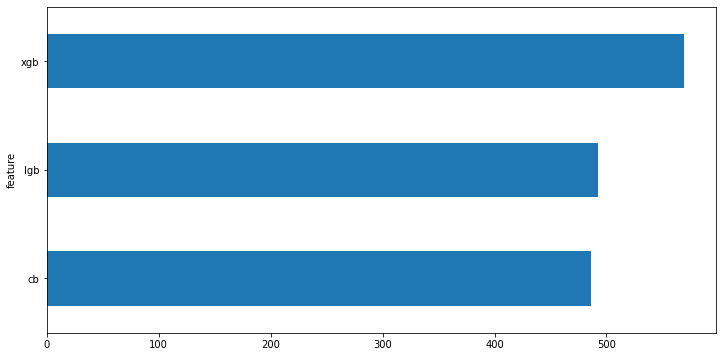

In [ ]:
clf = LGBMRegressor(n_estimators = 200,
                        learning_rate = 0.1,
                        colsample_bytree = 0.90,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 10, 'eval_metric': 'rmse'}
feat = ['lgb', 'cb', 'xgb']
lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_new, test_new, feat)

In [ ]:
lgb_preds_t1 = np.expm1(lgb_preds)
ens_meta_all = pd.DataFrame({'video_id':test.video_id})
ens_meta_all['likes'] = lgb_preds_t1

In [ ]:
ens_meta_all.to_csv('/content/drive/My Drive/Colab Notebooks/ens2_mall.csv', index=False)

In [ ]:
def thresh(lgbt, cbt, xgbt):
  m = np.arange(0,100) / 100
  n = np.arange(0,100) / 100
  p = np.arange(0, 100) / 100
  
  print(av_metric(train_proc['likes'], m*lgbt + n*cbt + p*xgbt))

In [ ]:
thresh(lgb_oofs, cb_oofs, xgb_oofs)

ValueError: ignored

In [ ]:
av_metric(train_proc['likes'], lr.fit(train_new[feat], train_new['likes']).predict(train_new[feat]))

464.0597757365065

In [ ]:
lr = LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_preds = lr.predict(test_new[feat])

In [ ]:
lr_preds_t1 = np.expm1(lr_preds)
ens_meta_alllr = pd.DataFrame({'video_id':test.video_id})
ens_meta_alllr['likes'] = lr_preds_t1

In [ ]:
ens_meta_alllr.head()

,video_id,likes
0,87185,752.519345
1,9431,2402.396988
2,40599,52.991777
3,494,3166.210638
4,73942,505.249709


In [ ]:
ens_meta_alllr.to_csv('/content/drive/My Drive/Colab Notebooks/ens_malllr.csv', index=False)

In [ ]:
lr_oofs, lr_preds = run_clf_kfold(lr, train_new, test_new, feat)


------------- Fold 1 -------------

AV metric score for validation set is 468.62014512306973

------------- Fold 2 -------------

AV metric score for validation set is 468.7258074533949

------------- Fold 3 -------------

AV metric score for validation set is 462.28296088477566

------------- Fold 4 -------------

AV metric score for validation set is 453.33996138150326

------------- Fold 5 -------------

AV metric score for validation set is 467.9140993568646


AV metric for oofs is 464.2145565100949


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
fit_params = {'early_stopping':20, 'verbose':200}
dt_oofs, dt_preds = run_clf_kfold(dt, train_new, test_new, feat)


------------- Fold 1 -------------

AV metric score for validation set is 676.3816006546527

------------- Fold 2 -------------

AV metric score for validation set is 659.7369971753166

------------- Fold 3 -------------

AV metric score for validation set is 656.5414893780772

------------- Fold 4 -------------

AV metric score for validation set is 672.0842215122705

------------- Fold 5 -------------

AV metric score for validation set is 672.0480372100265


AV metric for oofs is 667.403893039987


In [ ]:
train_new.head()

,cb,lgb,xgb,likes
0,7.774883,7.776117,7.858348,7.763021
1,8.327288,8.288283,8.386765,8.091015
2,5.638850,5.224750,5.263780,6.364751
3,10.952559,10.573499,10.735126,11.323869
4,8.293664,8.089736,8.207672,8.176954


In [ ]:
test_new.head()

,cb,lgb,xgb
0,6.657346,6.690943,6.538505
1,7.789561,7.748608,7.805331
2,3.905570,3.839414,4.258735
3,7.923671,8.142094,8.108187
4,6.316550,6.207576,6.170307


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

model.fit(train_new[feat], train_new['likes'], validation_split=0.1)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

733/733 [==============================] - 1s 1ms/step - loss: 12.8053 - val_loss: 0.2463


In [ ]:
av_metric(train_new['likes'], model.predict(train_new[feat]))

493.3708513098664

In [ ]:
train_new.head()

,cb,lgb,xgb,likes
0,7.774883,7.776117,7.858348,7.763021
1,8.327288,8.288283,8.386765,8.091015
2,5.638850,5.224750,5.263780,6.364751
3,10.952559,10.573499,10.735126,11.323869
4,8.293664,8.089736,8.207672,8.176954


In [ ]:
ens3_nm.head()

,video_id,likes
0,87185,756.142697
1,9431,2393.288122
2,40599,53.577497
3,494,3160.573513
4,73942,507.384945


In [ ]:
ens3_nm['likes'].min()

3.1514853620709093